In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('file:///F:/test%20(1).csv')
df

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [4]:
df.shape

(1000, 21)

In [5]:
df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [6]:
df.describe().T

count       mean          std    min      25%     50%  \
id             1000.0   500.5000   288.819436    1.0   250.75   500.5   
battery_power  1000.0  1248.5100   432.458227  500.0   895.00  1246.5   
blue           1000.0     0.5160     0.499994    0.0     0.00     1.0   
clock_speed    1000.0     1.5409     0.829268    0.5     0.70     1.5   
dual_sim       1000.0     0.5170     0.499961    0.0     0.00     1.0   
fc             1000.0     4.5930     4.463325    0.0     1.00     3.0   
four_g         1000.0     0.4870     0.500081    0.0     0.00     0.0   
int_memory     1000.0    33.6520    18.128694    2.0    18.00    34.5   
m_dep          1000.0     0.5175     0.280861    0.1     0.30     0.5   
mobile_wt      1000.0   139.5110    34.851550   80.0   109.75   139.0   
n_cores        1000.0     4.3280     2.288155    1.0     2.00     4.0   
pc             1000.0    10.0540     6.095099    0.0     5.00    10.0   
px_height      1000.0   627.1210   432.929699    0.0   263.75   564.5   
px_width       1000.0  1239.7740   439.670981  501.0   831.75  1250.0   
ram            1000.0  2138.9980  1088.092278  263.0  1237.25  2153.5   
sc_h           1000.0    11.9950     4.320607    5.0     8.00    12.0   
sc_w           1000.0     5.3160     4.240062    0.0     2.00     5.0   
talk_time      1000.0    11.0850     5.497636    2.0     6.75    11.0   
three_g        1000.0     0.7560     0.429708    0.0     1.00     1.0   
touch_screen   1000.0     0.5000     0.500250    0.0     0.00     0.5   
wifi           1000.0     0.5070     0.500201    0.0     0.00     1.0   

                   75%     max  
id              750.25  1000.0  
battery_power  1629.25  1999.0  
blue              1.00     1.0  
clock_speed       2.30     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       49.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           6.00     8.0  
pc               16.00    20.0  
px_height       903.00  1907.0  
px_width       1637.75  1998.0  
ram            3065.50  3989.0  
sc_h             16.00    19.0  
sc_w              8.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0

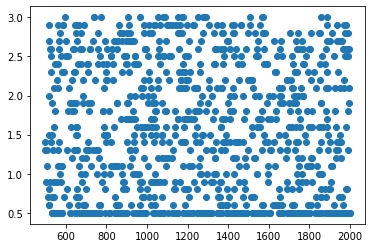

In [7]:
plt.scatter(df[['battery_power']],df['clock_speed'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

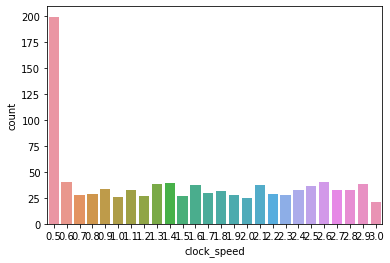

In [9]:
seaborn.countplot(df['clock_speed'])

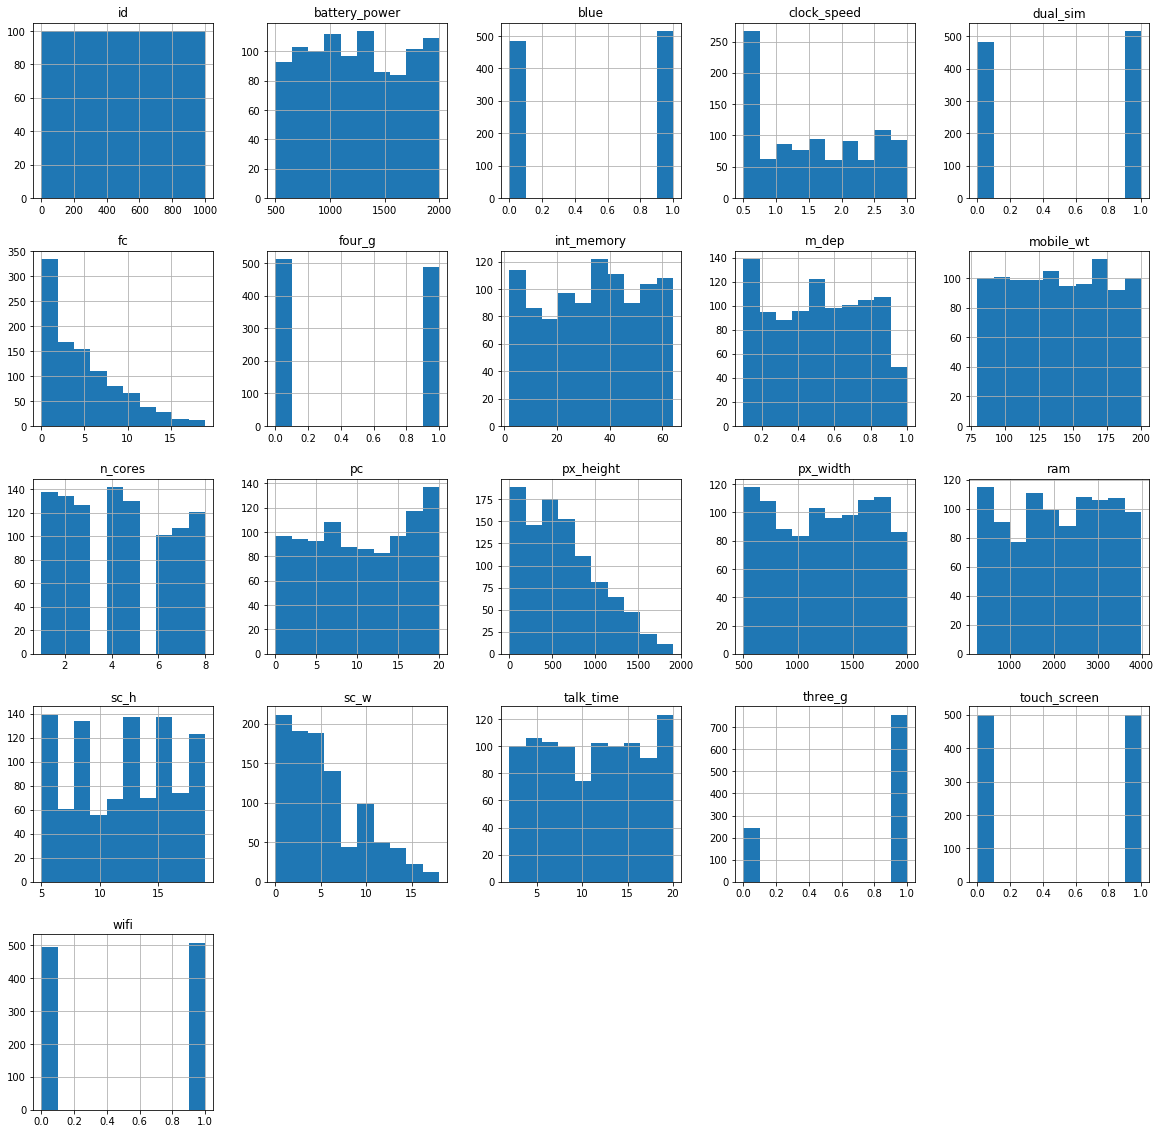

In [10]:
df.hist(figsize=(20,20))
plt.show()

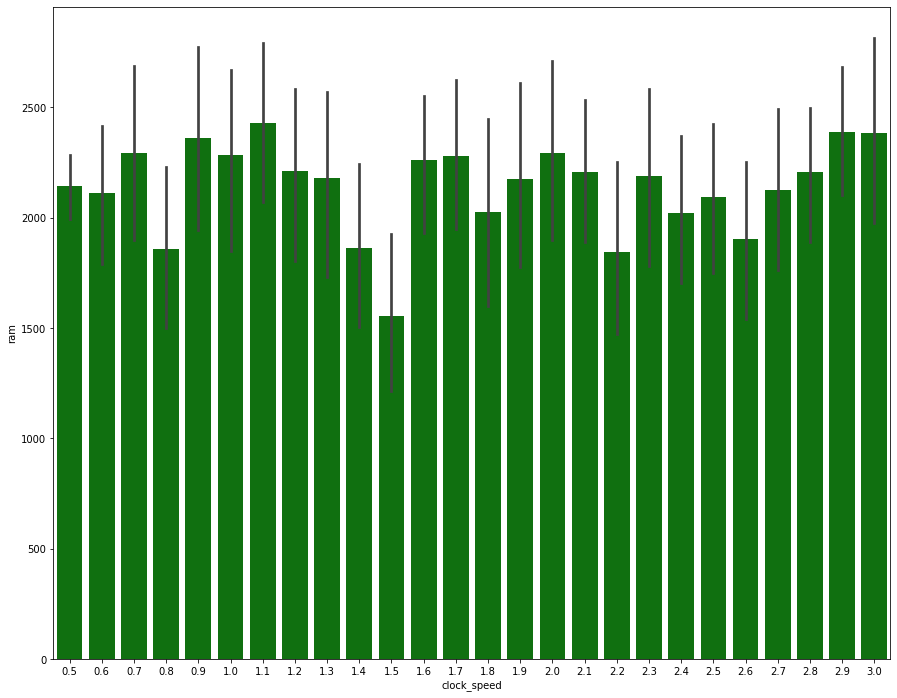

In [11]:
plt.figure(figsize=(15,12))
seaborn.barplot(x='clock_speed',y='ram',data=df,color='green')

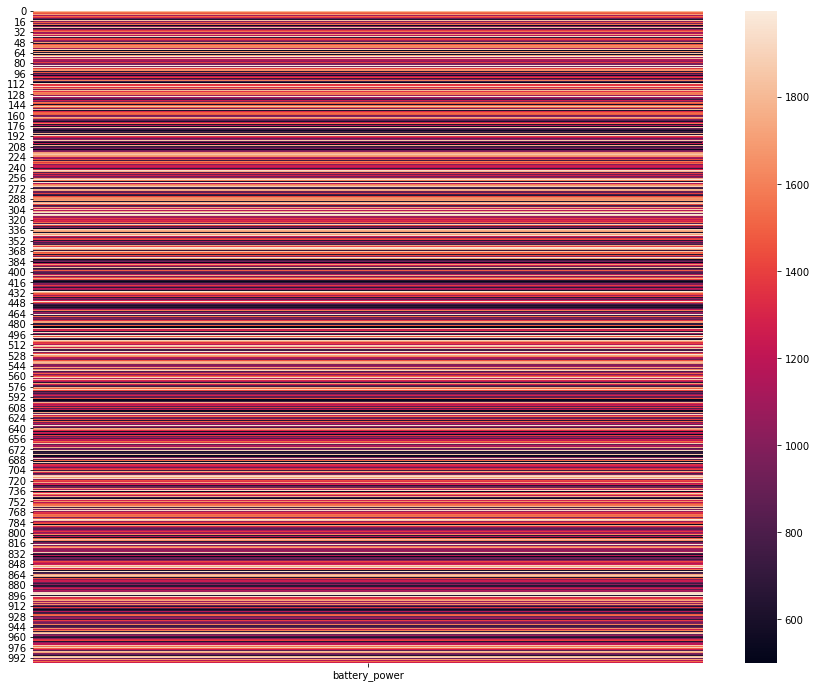

In [12]:
plt.figure(figsize=(15,12))
seaborn.heatmap(df[['battery_power']])

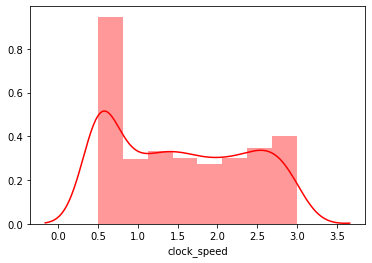

In [13]:
seaborn.distplot(df['clock_speed'],color='red')

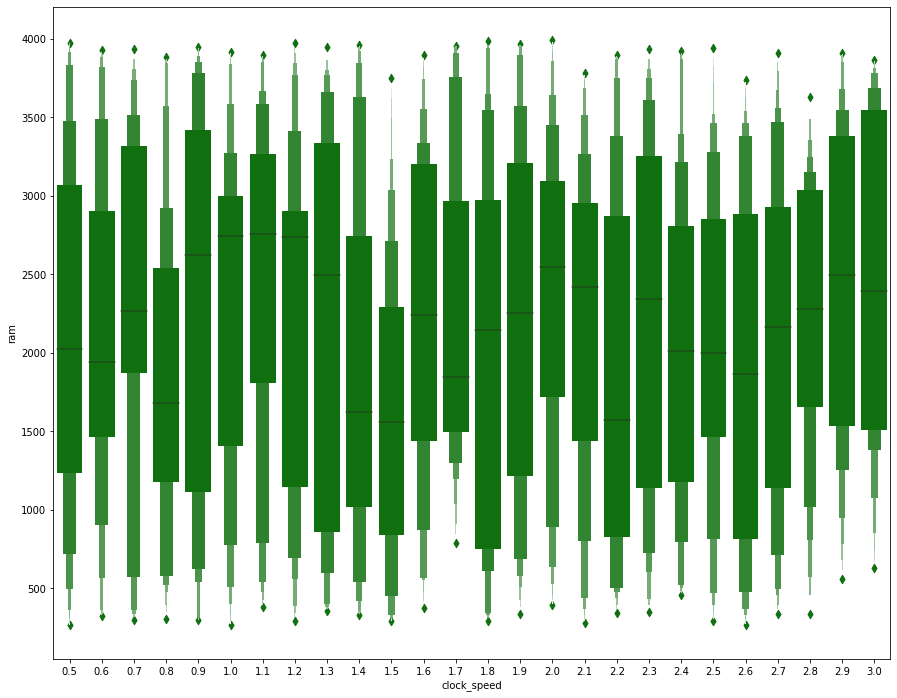

In [14]:
plt.figure(figsize=(15,12))
seaborn.boxenplot(x='clock_speed',y='ram',data=df,color='green')

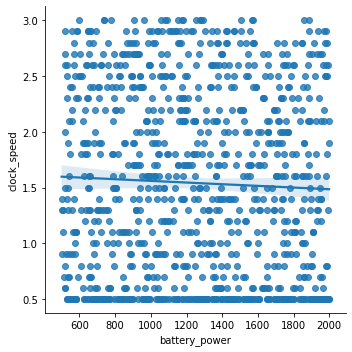

In [15]:
seaborn.lmplot(x='battery_power',y='clock_speed',data=df)

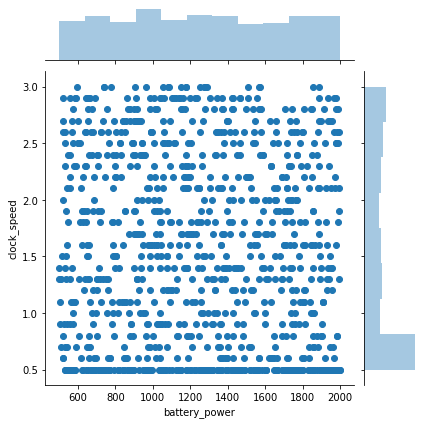

In [16]:
seaborn.jointplot(x='battery_power',y='clock_speed',data=df)

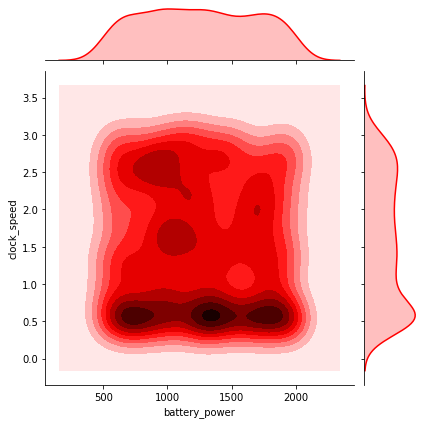

In [17]:
seaborn.jointplot(x='battery_power',y='clock_speed',data=df,color='red',kind='kde')

In [18]:
import sweetviz as sv

In [19]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
from IPython.display import IFrame

In [21]:
IFrame(src='Analyze.html',width=1000,height=600)

In [22]:
from dataprep.eda import *

  0%|          | 0/3531 [00:00<?, ?it/s]

DataPrep Report
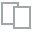
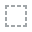
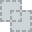
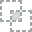
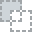
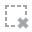
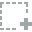
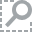
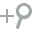
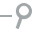
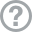
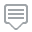
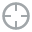
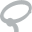
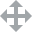
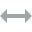
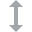
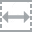
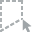
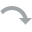
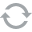
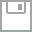
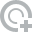
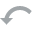
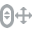
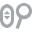
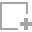
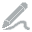
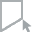
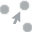
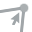
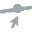

In [23]:
create_report(df)

In [24]:
df.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

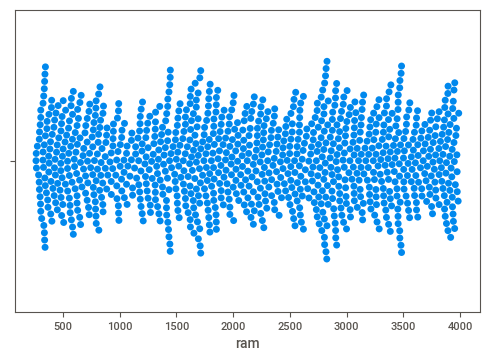

In [25]:
seaborn.swarmplot(df['ram'])

In [26]:
df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
men=MinMaxScaler()
feat=['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
df[feat]=men.fit_transform(df[feat])
df[feat]

id  battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0    0.000000       0.362241   1.0         0.52       1.0  0.736842     0.0   
1    0.001001       0.227485   1.0         0.00       1.0  0.210526     1.0   
2    0.002002       0.871915   1.0         0.92       0.0  0.052632     0.0   
3    0.003003       0.697799   0.0         0.00       1.0  0.947368     1.0   
4    0.004004       0.623082   0.0         0.36       0.0  0.578947     1.0   
..        ...            ...   ...          ...       ...       ...     ...   
995  0.995996       0.800534   1.0         0.56       0.0  0.000000     1.0   
996  0.996997       0.072715   0.0         0.52       1.0  0.000000     0.0   
997  0.997998       0.456971   0.0         0.36       0.0  0.052632     1.0   
998  0.998999       0.689126   1.0         0.00       1.0  0.000000     0.0   
999  1.000000       0.513676   1.0         0.00       0.0  0.210526     1.0   

     int_memory     m_dep  mobile_wt  ...    pc  px_height  px_width  \
0      0.048387  0.000000   0.941667  ...  0.80   0.118511  0.608550   
1      0.951613  0.777778   0.925000  ...  0.60   0.391190  0.237809   
2      0.403226  0.888889   0.883333  ...  0.20   0.665967  0.577822   
3      0.370968  0.444444   0.133333  ...  1.00   0.154693  0.835671   
4      0.758065  0.444444   0.233333  ...  0.90   0.392764  0.206413   
..          ...       ...        ...  ...   ...        ...       ...   
995    0.838710  0.444444   0.750000  ...  0.85   0.337703  0.275217   
996    0.177419  0.888889   0.883333  ...  0.10   0.604090  0.755511   
997    0.096774  0.444444   0.000000  ...  0.60   0.250131  0.216433   
998    0.774194  0.333333   0.758333  ...  0.60   0.019927  0.221109   
999    0.532258  0.000000   0.500000  ...  0.95   0.239643  0.071476   

          ram      sc_h      sc_w  talk_time  three_g  touch_screen  wifi  
0    0.862319  0.500000  0.388889   0.000000      0.0           1.0   0.0  
1    0.974772  0.071429  0.000000   0.277778      1.0           0.0   0.0  
2    0.572464  0.857143  0.555556   0.444444      0.0           1.0   1.0  
3    0.974235  0.357143  0.000000   0.277778      1.0           1.0   0.0  
4    0.405260  0.714286  0.444444   0.277778      1.0           0.0   1.0  
..        ...       ...       ...        ...      ...           ...   ...  
995  0.498658  0.642857  0.444444   0.722222      1.0           1.0   0.0  
996  0.448202  0.214286  0.055556   0.944444      0.0           1.0   1.0  
997  0.257649  0.000000  0.000000   0.666667      1.0           0.0   0.0  
998  0.602791  0.714286  0.611111   0.222222      0.0           1.0   0.0  
999  0.688406  0.285714  0.111111   0.055556      1.0           0.0   1.0  

[1000 rows x 21 columns]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
std=StandardScaler()
feat=['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
df[feat]=std.fit_transform(df[feat])
df[feat]

id  battery_power      blue  clock_speed  dual_sim        fc  \
0   -1.730320      -0.475451  0.968496     0.312601  0.966559  2.108676   
1   -1.726856      -0.942782  0.968496    -1.255832  0.966559 -0.132927   
2   -1.723391       1.292077  0.968496     1.519087 -1.034598 -0.805408   
3   -1.719927       0.688249 -1.032529    -1.255832  0.966559  3.005317   
4   -1.716463       0.429135 -1.032529    -0.169994 -1.034598  1.436195   
..        ...            ...       ...          ...       ...       ...   
995  1.716463       1.044531  0.968496     0.433249 -1.034598 -1.029568   
996  1.719927      -1.479519 -1.032529     0.312601  0.966559 -1.029568   
997  1.723391      -0.146932 -1.032529    -0.169994 -1.034598 -0.805408   
998  1.726856       0.658173  0.968496    -1.255832  0.966559 -1.029568   
999  1.730320       0.049718  0.968496    -1.255832 -1.034598 -0.132927   

       four_g  int_memory     m_dep  mobile_wt  ...        pc  px_height  \
0   -0.974329   -1.581269 -1.487247   1.535535  ...  0.976026  -0.926990   
1    1.026347    1.509303  1.006341   1.478120  ...  0.319433   0.274729   
2   -0.974329   -0.367116  1.362567   1.334582  ... -0.993754   1.485693   
3    1.026347   -0.477493 -0.062340  -1.249091  ...  1.632619  -0.767532   
4    1.026347    0.847037 -0.062340  -0.904602  ...  1.304323   0.281662   
..        ...         ...       ...        ...  ...       ...        ...   
995  1.026347    1.122981 -0.062340   0.875263  ...  1.140174   0.039007   
996 -0.974329   -1.139759  1.362567   1.334582  ... -1.322051   1.212995   
997  1.026347   -1.415702 -0.062340  -1.708411  ...  0.319433  -0.346930   
998 -0.974329    0.902226 -0.418566   0.903970  ...  0.319433  -1.361458   
999  1.026347    0.074394 -1.487247   0.014038  ...  1.468471  -0.393150   

     px_width       ram      sc_h      sc_w  talk_time   three_g  \
0    0.391912  1.229373  0.001158  0.397363  -1.653355 -1.760216   
1   -0.871028  1.614643 -1.388231 -1.254383  -0.743418  0.568112   
2    0.287236  0.236313  1.158982  1.105254  -0.197456 -1.760216   
3    1.165604  1.612804 -0.461972 -1.254383  -0.743418  0.568112   
4   -0.977979 -0.336535  0.695852  0.633326  -0.743418  0.568112   
..        ...       ...       ...       ...        ...       ...   
995 -0.743596 -0.016549  0.464287  0.633326   0.712481  0.568112   
996  0.892536 -0.189415 -0.925101 -1.018419   1.440430 -1.760216   
997 -0.943846 -0.842260 -1.619796 -1.254383   0.530493  0.568112   
998 -0.927917  0.340217  0.695852  1.341217  -0.925406 -1.760216   
999 -1.437643  0.633537 -0.693537 -0.782455  -1.471368  0.568112   

     touch_screen      wifi  
0             1.0 -1.014099  
1            -1.0 -1.014099  
2             1.0  0.986097  
3             1.0 -1.014099  
4            -1.0  0.986097  
..            ...       ...  
995           1.0 -1.014099  
996           1.0  0.986097  
997          -1.0 -1.014099  
998           1.0 -1.014099  
999          -1.0  0.986097  

[1000 rows x 21 columns]